# Peter in volk: Uvod v okrepljeno učenje

V tem vodiču se bomo naučili, kako uporabiti okrepljeno učenje za reševanje problema iskanja poti. Zgodba je navdihnjena z glasbeno pravljico [Peter in volk](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) ruskega skladatelja [Sergeja Prokofjeva](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Gre za zgodbo o mladem pionirju Petru, ki pogumno zapusti svojo hišo in se odpravi na gozdno jaso, da bi lovil volka. Naučili bomo algoritme strojnega učenja, ki bodo Petru pomagali raziskati okolico in zgraditi optimalen navigacijski zemljevid.

Najprej uvozimo nekaj uporabnih knjižnic:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Pregled učenja z okrepitvijo

**Učenje z okrepitvijo** (RL) je tehnika učenja, ki nam omogoča, da se naučimo optimalnega vedenja **agenta** v nekem **okolju** z izvajanjem številnih poskusov. Agent v tem okolju mora imeti določen **cilj**, ki ga opredeljuje **funkcija nagrajevanja**.

## Okolje

Za enostavnost si predstavljajmo Peterjev svet kot kvadratno ploščo velikosti `width` x `height`. Vsaka celica na tej plošči je lahko:
* **zemlja**, po kateri lahko Peter in druga bitja hodijo
* **voda**, po kateri se seveda ne more hoditi
* **drevo** ali **trava** - mesto, kjer se lahko spočiješ
* **jabolko**, ki predstavlja nekaj, kar bi Peter z veseljem našel, da se nahrani
* **volk**, ki je nevaren in se mu je treba izogniti

Za delo z okoljem bomo definirali razred `Board`. Da ne bi preveč obremenili tega zvezka, smo vso kodo za delo s ploščo premaknili v ločen modul `rlboard`, ki ga bomo zdaj uvozili. Več podrobnosti o notranji implementaciji si lahko ogledate znotraj tega modula.


Zdaj ustvarimo naključno ploščo in si oglejmo, kako izgleda:


In [4]:
# code block 1

## Dejanja in Pravila

V našem primeru bi bil Peterjev cilj najti jabolko, medtem ko se izogiba volku in drugim oviram. Določite ta dejanja kot slovar in jih povežite s pari ustreznih sprememb koordinat.


In [5]:
# code block 2

Strategija našega agenta (Peter) je določena z tako imenovano **politiko**. Oglejmo si najpreprostejšo politiko, imenovano **naključna hoja**.

## Naključna hoja

Najprej rešimo naš problem z implementacijo strategije naključne hoje.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Funkcija nagrajevanja

Da bi naša politika postala bolj inteligentna, moramo razumeti, kateri premiki so "boljši" od drugih.


In [8]:
#code block 5

## Q-Učenje

Ustvarite Q-tabelo ali večdimenzionalno matriko. Ker ima naša plošča dimenzije `width` x `height`, lahko Q-tabelo predstavimo z numpy matriko oblike `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Podajte Q-tabelo funkciji `plot`, da vizualizirate tabelo na plošči:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Bistvo Q-Učenja: Bellmanova enačba in učni algoritem

Napišite psevdokodo za naš učni algoritem:

* Inicializirajte Q-tabelo Q z enakimi vrednostmi za vsa stanja in akcije
* Nastavite hitrost učenja $\alpha\leftarrow 1$
* Večkrat ponovite simulacijo
   1. Začnite na naključni poziciji
   1. Ponavljajte
        1. Izberite akcijo $a$ v stanju $s$
        2. Izvedite akcijo z premikom v novo stanje $s'$
        3. Če naletimo na pogoj konca igre ali je skupna nagrada premajhna - zaključite simulacijo  
        4. Izračunajte nagrado $r$ v novem stanju
        5. Posodobite Q-funkcijo v skladu z Bellmanovo enačbo: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Posodobite skupno nagrado in zmanjšajte $\alpha$.

## Izkoriščanje vs. Raziskovanje

Najboljši pristop je uravnotežiti med raziskovanjem in izkoriščanjem. Ko se več naučimo o našem okolju, bomo bolj verjetno sledili optimalni poti, vendar se občasno odločimo za nepreizkušeno pot.

## Python Implementacija

Sedaj smo pripravljeni implementirati učni algoritem. Pred tem potrebujemo tudi funkcijo, ki bo poljubne številke v Q-tabeli pretvorila v vektor verjetnosti za ustrezne akcije:


In [10]:
# code block 7

Dodamo majhno količino `eps` k prvotnemu vektorju, da se izognemo deljenju z 0 v začetnem primeru, ko so vse komponente vektorja enake.

Dejanski učni algoritem bomo izvedli za 5000 poskusov, imenovanih tudi **epohi**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Po izvedbi tega algoritma bi morala biti Q-tabela posodobljena z vrednostmi, ki določajo privlačnost različnih dejanj na vsakem koraku. Vizualizirajte tabelo tukaj:


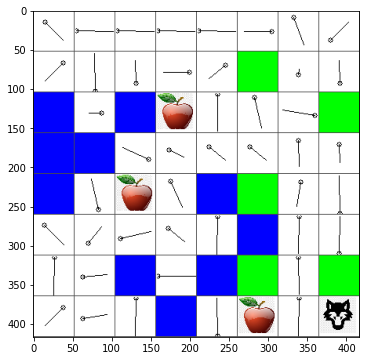

In [43]:
m.plot(Q)

## Preverjanje politike

Ker Q-Table navaja "privlačnost" vsakega dejanja v vsakem stanju, je zelo enostavno uporabiti to tabelo za določanje učinkovite navigacije v našem svetu. V najpreprostejšem primeru lahko preprosto izberemo dejanje, ki ustreza najvišji vrednosti v Q-Table:


In [13]:
# code block 9

2

Če večkrat preizkusite zgornjo kodo, boste opazili, da se včasih preprosto "zatakne" in morate pritisniti gumb STOP v zvezku, da jo prekinete.

> **Naloga 1:** Spremenite funkcijo `walk`, da omejite največjo dolžino poti na določeno število korakov (recimo 100), in opazujte, kako zgornja koda občasno vrne to vrednost.

> **Naloga 2:** Spremenite funkcijo `walk`, da se ne vrača na mesta, kjer je že bila prej. To bo preprečilo, da bi se `walk` zanka, vendar se agent še vedno lahko "ujame" na lokaciji, iz katere ne more pobegniti.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


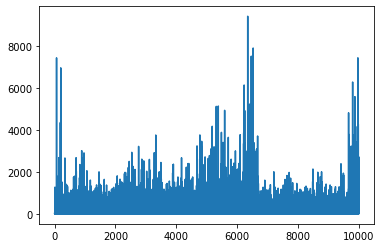

In [57]:
plt.plot(lpath)

## Vaja
## Bolj realističen svet Petra in volka



---

**Omejitev odgovornosti**:  
Ta dokument je bil preveden z uporabo storitve za strojno prevajanje [Co-op Translator](https://github.com/Azure/co-op-translator). Čeprav si prizadevamo za natančnost, vas prosimo, da upoštevate, da lahko avtomatizirani prevodi vsebujejo napake ali netočnosti. Izvirni dokument v njegovem izvirnem jeziku je treba obravnavati kot avtoritativni vir. Za ključne informacije priporočamo strokovno človeško prevajanje. Ne prevzemamo odgovornosti za morebitna nesporazumevanja ali napačne razlage, ki izhajajo iz uporabe tega prevoda.
